# Understanding the Business

## About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="darkgrid")
pd.set_option('display.max_columns', 50) 

In [3]:
train_df = pd.read_csv('train_ctrUa4K.csv')

# Understanding the data

In [4]:
print('No of records in training data :', train_df.shape)

No of records in training data : (614, 13)


In [5]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
round(train_df.isnull().sum(axis=0)/len(train_df)*100,2) # Pecentage of NaN per column in train set

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

**Catgorical features**
- Gender
- Married
- Dependants
- Education
- Self_Employed
- Credit_History
- Property_Area

**Numerical features**
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term??

### EDA - Univariate Analysis

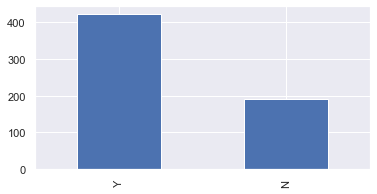

In [8]:
plt.figure(figsize=(6, 3))  
train_df.Loan_Status.value_counts().plot.bar();

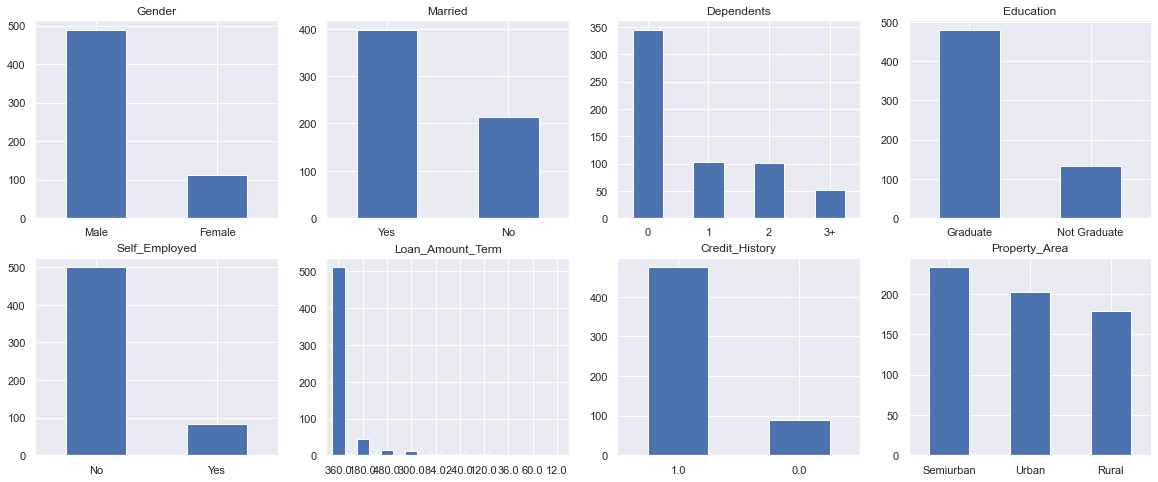

In [9]:
Cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

plt.figure(figsize=(20, 8))  
for i in range(0,2):
    for j in range(0,4):
        idx = (i*4)+j
        if(idx <=7):
            plt.subplot(2,4, idx+1)
            train_df[Cat_cols[idx]].value_counts().plot(kind='bar', title= Cat_cols[idx], rot=0)
plt.show()


In [10]:
def plot_univariate_continous(df, col):
    plt.figure(figsize=(10, 3))
    ax1 = plt.subplot(1, 2, 1)
    sns.distplot(df[col].dropna())
    ax2 = plt.subplot(1, 2, 2)
    sns.boxplot(df[col].dropna())
    plt.show()

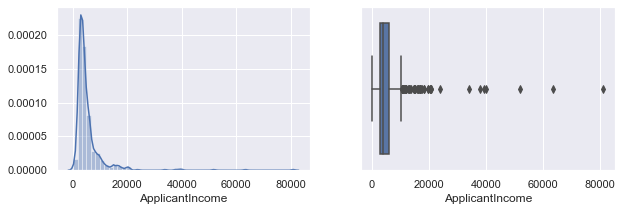

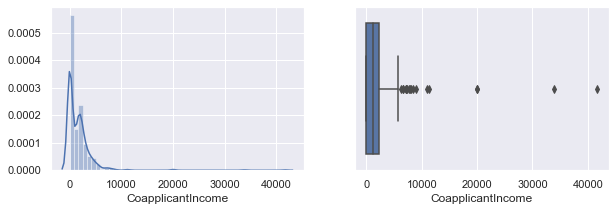

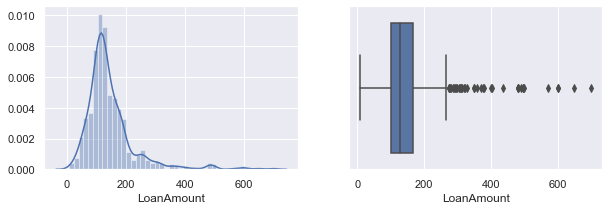

In [11]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

for col in num_cols:
    plot_univariate_continous(train_df, col)


### EDA - Bivariate Analysis

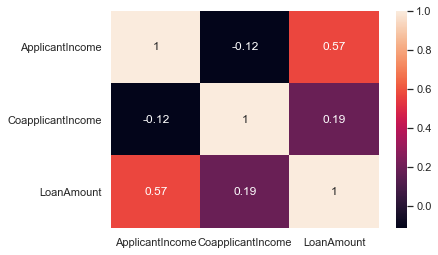

In [12]:
sns.heatmap(train_df[num_cols].corr(), annot=True)
plt.show()

In [13]:
#sns.regplot(x="ApplicantIncome", y="LoanAmount", data=train_df)
#plt.show()

#fig, axes = plt.subplots(2, 4, figsize =(20,6), sharey = True)
plt.figure(figsize=(20, 8))  
for i in range(0,2):
    for j in range(0,4):
        idx = (i*4)+j
        if(idx <=7):
            plt.subplot(2,4, idx+1)
            pd.crosstab(train_df[Cat_cols[idx]], train_df.Loan_Status, dropna=False, normalize='index').plot.bar(stacked=True, rot=0)
plt.show()

In [14]:
#for col in Cat_cols:
    #print(, '\n')

In [15]:
#for col in num_cols:
  # g = sns.boxplot(y=train_df[col].dropna(), x=train_df['Loan_Status'])
   #g.set_yscale("log")
  # plt.show()

### Feature Engineering

In [16]:
# impute categorical columns with Mode and numerical values with mean

In [17]:
train_df['Gender'].fillna( train_df['Gender'].dropna().mode().values[0], inplace=True)
train_df['Married'].fillna( train_df['Married'].dropna().mode().values[0], inplace=True)
train_df['Dependents'].fillna( train_df['Dependents'].dropna().mode().values[0], inplace=True)
train_df['Self_Employed'].fillna( train_df['Self_Employed'].dropna().mode().values[0], inplace=True)
train_df['Loan_Amount_Term'].fillna( train_df['Loan_Amount_Term'].dropna().mode().values[0], inplace=True)
train_df['Credit_History'].fillna( train_df['Credit_History'].dropna().mode().values[0], inplace=True)

In [18]:
train_df['Dependents'] = train_df['Dependents'].str.rstrip('+').astype(np.int) # to replace 3+ with 3

train_df['Gender'] = train_df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
train_df['Married'] = train_df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
train_df['Education'] = train_df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train_df['Self_Employed'] = train_df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)

train_df['Loan_Status'] = train_df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)


In [19]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna( train_df['LoanAmount'].dropna().mean() )

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(2)
memory usage: 48.1+ KB


In [21]:
train_df.drop(['Loan_ID'], axis=1, inplace=True)

### Deriving new features

In [22]:
train_df['LoanAmount'] = train_df['LoanAmount'] *  1000
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
Monthly_intrate = 1 # equal to 12% Anual interest rate
p = train_df['LoanAmount']
R = 8 ## Anual rate
r = R /(12*100)
n = train_df['Loan_Amount_Term']
train_df['EMI']= (p*r* np.power(1+r, n))/(np.power(1+r, n)-1)

#train_df['EMI'] = train_df['LoanAmount']/ train_df['Loan_Amount_Term']
train_df['BalanceIncome'] =  train_df['EMI'] / train_df['TotalIncome']

In [23]:
train_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,EMI,BalanceIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,146412.162162,342.410423,0.855049,0.687296,7024.705081,1135.788982,0.186271
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84037.467683,64.428629,0.352339,0.463973,6458.663872,761.178708,0.098037
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9000.000000,12.000000,0.000000,0.000000,1442.000000,66.038812,0.018512
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100250.000000,360.000000,1.000000,0.000000,4166.000000,755.777511,0.145283
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129000.000000,360.000000,1.000000,1.000000,5416.500000,968.569238,0.181051
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164750.000000,360.000000,1.000000,1.000000,7521.750000,1280.820321,0.212957
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700000.000000,480.000000,1.000000,1.000000,81000.000000,9655.715628,1.395328


In [24]:
train_df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,BalanceIncome
0,1,0,0,1,0,5849,0.0,146412.162162,360.0,1.0,Urban,1,5849.0,1074.320578,0.183676
1,1,1,1,1,0,4583,1508.0,128000.000000,360.0,1.0,Rural,0,6091.0,939.218655,0.154198
2,1,1,0,1,1,3000,0.0,66000.000000,360.0,1.0,Urban,1,3000.0,484.284619,0.161428
3,1,1,0,0,0,2583,2358.0,120000.000000,360.0,1.0,Urban,1,4941.0,880.517489,0.178206
4,1,0,0,1,0,6000,0.0,141000.000000,360.0,1.0,Urban,1,6000.0,1034.608049,0.172435


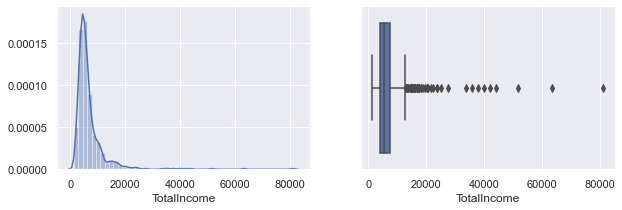

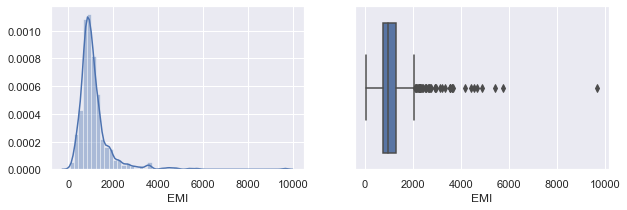

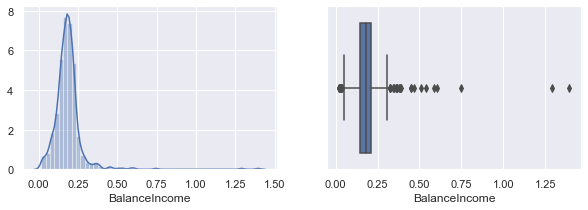

In [25]:
derive_col = ['TotalIncome','EMI','BalanceIncome']

for col in derive_col:
    plot_univariate_continous(train_df, col)

In [26]:
#sns.boxplot(x=train_df.Loan_Status, y=train_df.BalanceIncome)

def apply_transformation(transform_type):
    if(transform_type == 'log'):


In [27]:
        train_df['log_TotalIncome'] = np.log(train_df['TotalIncome'])
        #train_df['log_ApplicantIncome'] = np.log(train_df['ApplicantIncome']+1)
       # train_df['log_CoapplicantIncome'] = np.log(train_df['CoapplicantIncome']+1)
        train_df['log_LoanAmount'] = np.log(train_df['LoanAmount'])
        train_df['log_EMI'] = np.log(train_df['EMI'])
        train_df['log_BalanceIncome'] = np.log(train_df['BalanceIncome'])

In [28]:
#train_df.drop(['TotalIncome', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'EMI', 'BalanceIncome', 'Loan_Amount_Term' ], axis=1, inplace=True)

In [29]:
train_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,EMI,BalanceIncome,log_TotalIncome,log_LoanAmount,log_EMI,log_BalanceIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,146412.162162,342.410423,0.855049,0.687296,7024.705081,1135.788982,0.186271,8.669414,11.769821,6.894058,-1.775356
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84037.467683,64.428629,0.352339,0.463973,6458.663872,761.178708,0.098037,0.545102,0.496575,0.512907,0.449916
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9000.000000,12.000000,0.000000,0.000000,1442.000000,66.038812,0.018512,7.273786,9.104980,4.190243,-3.989322
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100250.000000,360.000000,1.000000,0.000000,4166.000000,755.777511,0.145283,8.334712,11.515413,6.627747,-1.929072
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129000.000000,360.000000,1.000000,1.000000,5416.500000,968.569238,0.181051,8.597205,11.767568,6.875820,-1.708979
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164750.000000,360.000000,1.000000,1.000000,7521.750000,1280.820321,0.212957,8.925549,12.012181,7.155246,-1.546665
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700000.000000,480.000000,1.000000,1.000000,81000.000000,9655.715628,1.395328,11.302204,13.458836,9.175305,0.333129


In [30]:
train_df = pd.get_dummies(train_df) 

In [31]:
X = train_df.drop(['Loan_Status'], axis=1)
y = train_df.Loan_Status

## Model Preparation

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
#from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### XGBoost 

In [33]:

# hyperparameter tuning with XGBoost

# specify range of hyperparameters
param_grid = { 
              #'learning_rate':[0.01],
              #'max_depth': range(3,11,1),
              'max_depth': [2, 3,4],
              #'n_estimators':range(100,1300,100),
              'n_estimators': [ 50, 75],
               'subsample' : [0.7, 0.8, 1.0]
              #'gamma': [0,0.1,0.2,0.3,0.4],
              #'gamma': [0],
              # 'reg_alpha':[0.01,0.1,1,10],
              #'reg_lambda':[0.01,0.1,1,10],   
            #   'scale_pos_weight': [0.25] 
             #   'scale_pos_weight': ['balanced']
             }

# specify model
folds = folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring = ['accuracy', 'recall', 'precision']
xgb = XGBClassifier(random_state=42)

# set up GridSearchCV()
model_cv_xgb = GridSearchCV(estimator = xgb,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit = 'accuracy',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True) 

model_cv_xgb.fit(X, y)
cv_result_xgb =pd.DataFrame(model_cv_xgb.cv_results_)
display(cv_result_xgb)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=2, n_estimators=50, subsample=0.7 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, n_estimators=50, subsample=0.7, accuracy=(train=0.827, test=0.813), precision=(train=0.807, test=0.798), recall=(train=0.982, test=0.976), total=   0.3s
[CV] max_depth=2, n_estimators=50, subsample=0.7 .....................
[CV]  max_depth=2, n_estimators=50, subsample=0.7, accuracy=(train=0.831, test=0.805), precision=(train=0.810, test=0.808), recall=(train=0.985, test=0.941), total=   0.0s
[CV] max_depth=2, n_estimators=50, subsample=0.7 .....................
[CV]  max_depth=2, n_estimators=50, subsample=0.7, accuracy=(train=0.829, test=0.797), precision=(train=0.813, test=0.781), recall=(train=0.976, test=0.976), total=   0.1s
[CV] max_depth=2, n_estimators=50, subsample=0.7 .....................
[CV]  max_depth=2, n_estimators=50, subsample=0.7, accuracy=(train=0.833, test=0.789), precision=(train=0.820, test=0.779), recall=(train=0.970, test=0.964), total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] max_depth=2, n_estimators=50, subsample=0.7 .....................
[CV]  max_depth=2, n_estimators=50, subsample=0.7, accuracy=(train=0.829, test=0.820), precision=(train=0.811, test=0.810), recall=(train=0.979, test=0.964), total=   0.1s
[CV] max_depth=2, n_estimators=50, subsample=0.8 .....................
[CV]  max_depth=2, n_estimators=50, subsample=0.8, accuracy=(train=0.837, test=0.805), precision=(train=0.817, test=0.796), recall=(train=0.982, test=0.965), total=   0.0s
[CV] max_depth=2, n_estimators=50, subsample=0.8 .....................
[CV]  max_depth=2, n_estimators=50, subsample=0.8, accuracy=(train=0.833, test=0.821), precision=(train=0.812, test=0.812), recall=(train=0.985, test=0.965), total=   0.0s
[CV] max_depth=2, n_estimators=50, subsample=0.8 .....................
[CV]  max_depth=2, n_estimators=50, subsample=0.8, accuracy=(train=0.833, test=0.797), precision=(train=0.817, test=0.781), recall=(train=0.976, test=0.976), total=   0.1s
[CV] max_depth=2, n_estimato

[CV] max_depth=3, n_estimators=50, subsample=0.8 .....................
[CV]  max_depth=3, n_estimators=50, subsample=0.8, accuracy=(train=0.854, test=0.820), precision=(train=0.836, test=0.816), recall=(train=0.979, test=0.952), total=   0.1s
[CV] max_depth=3, n_estimators=50, subsample=1.0 .....................
[CV]  max_depth=3, n_estimators=50, subsample=1.0, accuracy=(train=0.851, test=0.797), precision=(train=0.832, test=0.794), recall=(train=0.982, test=0.953), total=   0.1s
[CV] max_depth=3, n_estimators=50, subsample=1.0 .....................
[CV]  max_depth=3, n_estimators=50, subsample=1.0, accuracy=(train=0.857, test=0.813), precision=(train=0.836, test=0.816), recall=(train=0.985, test=0.941), total=   0.1s
[CV] max_depth=3, n_estimators=50, subsample=1.0 .....................
[CV]  max_depth=3, n_estimators=50, subsample=1.0, accuracy=(train=0.862, test=0.797), precision=(train=0.838, test=0.786), recall=(train=0.991, test=0.964), total=   0.1s
[CV] max_depth=3, n_estimato

[CV]  max_depth=4, n_estimators=75, subsample=0.7, accuracy=(train=0.904, test=0.813), precision=(train=0.886, test=0.830), recall=(train=0.988, test=0.918), total=   0.1s
[CV] max_depth=4, n_estimators=75, subsample=0.7 .....................
[CV]  max_depth=4, n_estimators=75, subsample=0.7, accuracy=(train=0.906, test=0.805), precision=(train=0.888, test=0.814), recall=(train=0.988, test=0.929), total=   0.1s
[CV] max_depth=4, n_estimators=75, subsample=0.7 .....................
[CV]  max_depth=4, n_estimators=75, subsample=0.7, accuracy=(train=0.916, test=0.772), precision=(train=0.900, test=0.775), recall=(train=0.988, test=0.940), total=   0.1s
[CV] max_depth=4, n_estimators=75, subsample=0.7 .....................
[CV]  max_depth=4, n_estimators=75, subsample=0.7, accuracy=(train=0.902, test=0.764), precision=(train=0.886, test=0.789), recall=(train=0.985, test=0.893), total=   0.1s
[CV] max_depth=4, n_estimators=75, subsample=0.7 .....................
[CV]  max_depth=4, n_estimat

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    7.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_subsample,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_recall,split1_test_recall,...,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision
0,0.108970,0.117527,0.002394,0.001354,2,50,0.7,"{'max_depth': 2, 'n_estimators': 50, 'subsampl...",0.813008,0.804878,0.796748,0.788618,0.819672,0.804585,0.011091,2,0.826884,0.830957,0.828921,0.832994,0.829268,0.829805,0.002054,0.976471,0.941176,...,0.964482,0.012838,2,0.982196,0.985163,0.976331,0.970414,0.979290,0.978679,0.005072,0.798077,0.808081,0.780952,0.778846,0.810000,0.795191,0.013143,16,0.807317,0.809756,0.812808,0.820000,0.811275,0.812231,0.004287
1,0.054836,0.006640,0.001796,0.001466,2,50,0.8,"{'max_depth': 2, 'n_estimators': 50, 'subsampl...",0.804878,0.821138,0.796748,0.796748,0.819672,0.807837,0.010693,1,0.837067,0.832994,0.832994,0.832994,0.827236,0.832657,0.003136,0.964706,0.964706,...,0.969216,0.005697,1,0.982196,0.985163,0.976331,0.976331,0.982249,0.980454,0.003533,0.796117,0.811881,0.780952,0.780952,0.810000,0.795980,0.013424,14,0.817284,0.811736,0.816832,0.816832,0.807786,0.814094,0.003755
2,0.047355,0.004815,0.003980,0.005926,2,50,1,"{'max_depth': 2, 'n_estimators': 50, 'subsampl...",0.796748,0.804878,0.796748,0.780488,0.827869,0.801346,0.015449,8,0.832994,0.826884,0.826884,0.824847,0.829268,0.828175,0.002787,0.952941,0.941176,...,0.959776,0.011856,3,0.982196,0.985163,0.976331,0.979290,0.979290,0.980454,0.002997,0.794118,0.808081,0.780952,0.771429,0.818182,0.794552,0.017095,18,0.813268,0.805825,0.810811,0.807317,0.811275,0.809699,0.002725
3,0.070323,0.010083,0.001192,0.001460,2,75,0.7,"{'max_depth': 2, 'n_estimators': 75, 'subsampl...",0.804878,0.796748,0.796748,0.772358,0.803279,0.794802,0.011702,17,0.847251,0.847251,0.841141,0.843177,0.845528,0.844869,0.002389,0.941176,0.929412,...,0.945546,0.015937,10,0.979228,0.985163,0.979290,0.973373,0.976331,0.978677,0.003909,0.808081,0.806122,0.780952,0.774510,0.806122,0.795158,0.014392,17,0.829146,0.825871,0.823383,0.828715,0.829146,0.827252,0.002289
4,0.071383,0.009149,0.002595,0.001354,2,75,0.8,"{'max_depth': 2, 'n_estimators': 75, 'subsampl...",0.804878,0.796748,0.796748,0.780488,0.819672,0.799707,0.012745,10,0.845214,0.843177,0.843177,0.847251,0.841463,0.844056,0.001991,0.952941,0.929412,...,0.952661,0.014795,7,0.979228,0.985163,0.976331,0.979290,0.976331,0.979269,0.003225,0.801980,0.806122,0.780952,0.776699,0.816327,0.796416,0.015162,13,0.827068,0.821782,0.827068,0.829574,0.825000,0.826098,0.002600
5,0.064572,0.004236,0.004326,0.005805,2,75,1,"{'max_depth': 2, 'n_estimators': 75, 'subsampl...",0.804878,0.804878,0.796748,0.780488,0.819672,0.801333,0.012783,9,0.843177,0.841141,0.837067,0.845214,0.841463,0.841612,0.002695,0.952941,0.941176,...,0.955014,0.011472,6,0.985163,0.985163,0.976331,0.979290,0.976331,0.980456,0.003993,0.801980,0.808081,0.780952,0.776699,0.816327,0.796808,0.015431,12,0.821782,0.819753,0.820896,0.827500,0.825000,0.822986,0.002853
6,0.067844,0.004983,0.002792,0.002393,3,50,0.7,"{'max_depth': 3, 'n_estimators': 50, 'subsampl...",0.821138,0.804878,0.788618,0.780488,0.819672,0.802959,0.016273,4,0.847251,0.853360,0.855397,0.855397,0.849593,0.852200,0.003258,0.988235,0.929412,...,0.95733

In [34]:
print('Best score : ', model_cv_xgb.best_score_, 'is obtained with ', model_cv_xgb.best_params_)
model_xgb = model_cv_xgb.best_estimator_
#print("\n Best Estimator:",model_xgb)
model_xgb.fit(X, y)

Best score :  0.8078368652538984 is obtained with  {'max_depth': 2, 'n_estimators': 50, 'subsample': 0.8}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

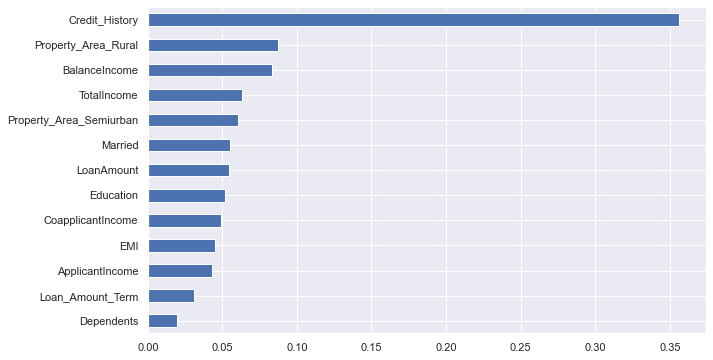

In [35]:
features = X.columns.tolist()
importance = model_xgb.feature_importances_
rf_coefs = pd.Series(importance,index=features)

plt.figure(figsize=(10,6))
rf_coefs[(rf_coefs>0.005)].sort_values().plot.barh()
plt.show()

### Random Forest

In [36]:
# hyperparameter tuning with Random Forest

# specify range of hyperparameters
param_grid = {
    
      'max_depth': [ 3, 4, 5],
     # 'max_depth': [10],
    # 'min_samples_leaf': range(50,200 ,50),
     'min_samples_split': [100, 150, 200],     
    # 'class_weight' : ['balanced', {0:1, 1:16}] ,           
     'class_weight' : [  None]  ,
    # 'n_estimators': range(100,300,100)
     'n_estimators': [100, 200]
   
}

# specify model
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring = ['accuracy', 'recall', 'precision']
rf2 = RandomForestClassifier( random_state=42,oob_score=True)

# set up GridSearchCV()

model_cv_rf2 = GridSearchCV(estimator = rf2,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit='accuracy',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True)                         
                
model_cv_rf2.fit(X, y)
cv_result_rf2 =pd.DataFrame(model_cv_rf2.cv_results_)
display(cv_result_rf2)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] class_weight=None, max_depth=3, min_samples_split=100, n_estimators=100 
[CV]  class_weight=None, max_depth=3, min_samples_split=100, n_estimators=100, accuracy=(train=0.817, test=0.821), precision=(train=0.798, test=0.800), recall=(train=0.982, test=0.988), total=   0.1s
[CV] class_weight=None, max_depth=3, min_samples_split=100, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight=None, max_depth=3, min_samples_split=100, n_estimators=100, accuracy=(train=0.813, test=0.813), precision=(train=0.792, test=0.804), recall=(train=0.985, test=0.965), total=   0.1s
[CV] class_weight=None, max_depth=3, min_samples_split=100, n_estimators=100 
[CV]  class_weight=None, max_depth=3, min_samples_split=100, n_estimators=100, accuracy=(train=0.825, test=0.805), precision=(train=0.807, test=0.783), recall=(train=0.979, test=0.988), total=   0.1s
[CV] class_weight=None, max_depth=3, min_samples_split=100, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  class_weight=None, max_depth=3, min_samples_split=100, n_estimators=100, accuracy=(train=0.821, test=0.797), precision=(train=0.800, test=0.781), recall=(train=0.985, test=0.976), total=   0.1s
[CV] class_weight=None, max_depth=3, min_samples_split=100, n_estimators=100 
[CV]  class_weight=None, max_depth=3, min_samples_split=100, n_estimators=100, accuracy=(train=0.821, test=0.820), precision=(train=0.802, test=0.810), recall=(train=0.982, test=0.964), total=   0.1s
[CV] class_weight=None, max_depth=3, min_samples_split=100, n_estimators=200 
[CV]  class_weight=None, max_depth=3, min_samples_split=100, n_estimators=200, accuracy=(train=0.815, test=0.813), precision=(train=0.796, test=0.792), recall=(train=0.982, test=0.988), total=   0.2s
[CV] class_weight=None, max_depth=3, min_samples_split=100, n_estimators=200 
[CV]  class_weight=None, max_depth=3, min_samples_split=100, n_estimators=200, accuracy=(train=0.813, test=0.813), precision=(train=0.792, test=0.804), recall=(train=

[CV]  class_weight=None, max_depth=4, min_samples_split=100, n_estimators=100, accuracy=(train=0.825, test=0.797), precision=(train=0.807, test=0.781), recall=(train=0.979, test=0.976), total=   0.1s
[CV] class_weight=None, max_depth=4, min_samples_split=100, n_estimators=100 
[CV]  class_weight=None, max_depth=4, min_samples_split=100, n_estimators=100, accuracy=(train=0.817, test=0.820), precision=(train=0.802, test=0.810), recall=(train=0.973, test=0.964), total=   0.1s
[CV] class_weight=None, max_depth=4, min_samples_split=100, n_estimators=200 
[CV]  class_weight=None, max_depth=4, min_samples_split=100, n_estimators=200, accuracy=(train=0.817, test=0.821), precision=(train=0.798, test=0.800), recall=(train=0.982, test=0.988), total=   0.2s
[CV] class_weight=None, max_depth=4, min_samples_split=100, n_estimators=200 
[CV]  class_weight=None, max_depth=4, min_samples_split=100, n_estimators=200, accuracy=(train=0.823, test=0.813), precision=(train=0.802, test=0.804), recall=(train=

[CV]  class_weight=None, max_depth=5, min_samples_split=100, n_estimators=100, accuracy=(train=0.827, test=0.780), precision=(train=0.811, test=0.777), recall=(train=0.976, test=0.952), total=   0.1s
[CV] class_weight=None, max_depth=5, min_samples_split=100, n_estimators=100 
[CV]  class_weight=None, max_depth=5, min_samples_split=100, n_estimators=100, accuracy=(train=0.825, test=0.820), precision=(train=0.810, test=0.810), recall=(train=0.973, test=0.964), total=   0.1s
[CV] class_weight=None, max_depth=5, min_samples_split=100, n_estimators=200 
[CV]  class_weight=None, max_depth=5, min_samples_split=100, n_estimators=200, accuracy=(train=0.819, test=0.829), precision=(train=0.800, test=0.808), recall=(train=0.982, test=0.988), total=   0.2s
[CV] class_weight=None, max_depth=5, min_samples_split=100, n_estimators=200 
[CV]  class_weight=None, max_depth=5, min_samples_split=100, n_estimators=200, accuracy=(train=0.829, test=0.813), precision=(train=0.809, test=0.804), recall=(train=

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   15.6s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_recall,...,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision
0,0.095085,0.011557,0.009208,0.006563,None,3,100,100,"{'class_weight': None, 'max_depth': 3, 'min_sa...",0.821138,0.813008,0.804878,0.796748,0.819672,0.811089,0.009193,2,0.816701,0.812627,0.824847,0.820774,0.821138,0.819217,0.004185,0.988235,...,0.976303,0.010586,9,0.982196,0.985163,0.979290,0.985207,0.982249,0.982821,0.002208,0.800000,0.803922,0.783019,0.780952,0.810000,0.795579,0.011565,4,0.797590,0.792363,0.807317,0.800481,0.801932,0.799937,0.004932
1,0.191341,0.013311,0.019295,0.006278,None,3,100,200,"{'class_weight': None, 'max_depth': 3, 'min_sa...",0.813008,0.813008,0.804878,0.796748,0.819672,0.809463,0.007900,7,0.814664,0.812627,0.826884,0.820774,0.815041,0.817998,0.005203,0.988235,...,0.976303,0.010586,9,0.982196,0.985163,0.982249,0.985207,0.979290,0.982821,0.002208,0.792453,0.803922,0.783019,0.780952,0.810000,0.794069,0.011381,12,0.795673,0.792363,0.807786,0.800481,0.797590,0.798779,0.005220
2,0.092407,0.010991,0.013760,0.002278,None,3,150,100,"{'class_weight': None, 'max_depth': 3, 'min_sa...",0.813008,0.821138,0.804878,0.796748,0.819672,0.811089,0.009193,2,0.816701,0.812627,0.820774,0.818737,0.813008,0.816369,0.003175,0.988235,...,0.978655,0.008924,3,0.982196,0.985163,0.982249,0.985207,0.976331,0.982229,0.003233,0.792453,0.805825,0.783019,0.780952,0.810000,0.794450,0.011731,9,0.797590,0.792363,0.801932,0.798561,0.797101,0.797510,0.003077
3,0.176222,0.010592,0.019480,0.007692,None,3,150,200,"{'class_weight': None, 'max_depth': 3, 'min_sa...",0.821138,0.821138,0.804878,0.796748,0.819672,0.812715,0.010066,1,0.816701,0.812627,0.820774,0.818737,0.813008,0.816369,0.003175,0.988235,...,0.978655,0.008924,3,0.982196,0.985163,0.982249,0.985207,0.979290,0.982821,0.002208,0.800000,0.805825,0.783019,0.780952,0.810000,0.795959,0.011861,3,0.797590,0.792363,0.801932,0.798561,0.795673,0.797224,0.003166
4,0.085026,0.005506,0.007903,0.010027,None,3,200,100,"{'class_weight': None, 'max_depth': 3, 'min_sa...",0.780488,0.821138,0.804878,0.796748,0.811475,0.802945,0.013786,18,0.800407,0.812627,0.816701,0.818737,0.815041,0.812703,0.006466,0.988235,...,0.981036,0.005822,1,0.982196,0.985163,0.982249,0.985207,0.985207,0.984004,0.001455,0.763636,0.805825,0.783019,0.780952,0.796117,0.785910,0.014352,18,0.782506,0.792363,0.798077,0.798561,0.794749,0.793251,0.005831
5,0.171900,0.009050,0.018734,0.006239,None,3,200,200,"{'class_weight': None, 'max_depth': 3, 'min_sa...",0.796748,0.821138,0.804878,0.796748,0.803279,0.804558,0.008929,16,0.808554,0.810591,0.818737,0.818737,0.813008,0.813925,0.004174,0.988235,...,0.981036,0.005822,1,0.982196,0.985163,0.982249,0.985207,0.982249,0.983413,0.001447,0.777778,0.805825,0.783019,0.780952,0.788462,0.787207,0.009938,17,0.789976,0.790476,0.800000,0.798561,0.794258,0.794654,0.004083
6,0.094616,0.005971,0.012968,0.007808,None,4,100,100,"{'class_weight': None, 'max_depth': 4, 'min_sa...",0.821138,0.813008,0.788618,0.796748,0.819672,0.807837,0.012931,11,0.816701,0.822811,0.828921,0.824847,0.817073,0.822070,0.004669,0.988235,...,0.971541,0.009511,1

In [37]:
print('Best score : ', model_cv_rf2.best_score_, 'is obtained with ', model_cv_rf2.best_params_)
model_rf = model_cv_rf2.best_estimator_
#print("\n Best Estimator:",model_xgb)
model_rf.fit(X, y)

Best score :  0.8127149140343863 is obtained with  {'class_weight': None, 'max_depth': 3, 'min_samples_split': 150, 'n_estimators': 200}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

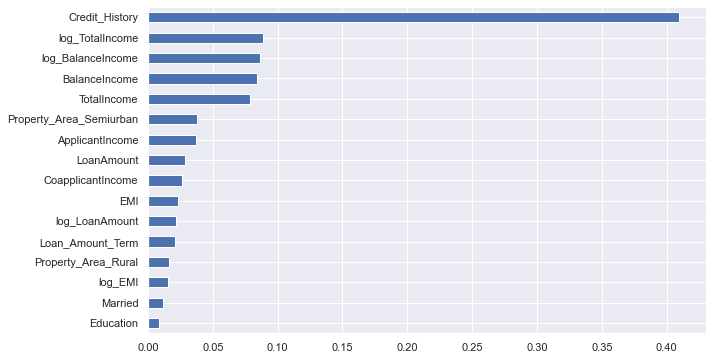

In [38]:
features = X.columns.tolist()
importance = model_rf.feature_importances_
rf_coefs = pd.Series(importance,index=features)

plt.figure(figsize=(10,6))
rf_coefs[(rf_coefs>0.005)].sort_values().plot.barh()
plt.show()

### ADA Boosting

In [39]:
from sklearn.ensemble import AdaBoostClassifier
# hyperparameter tuning with Random Forest

# specify range of hyperparameters
param_grid = {
    
     'learning_rate': [0.0001, 0.001, .01, .1],
     'n_estimators': [ 20, 50]
   
}


folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

scoring = ['accuracy', 'recall', 'precision']
rus_bc = AdaBoostClassifier(algorithm='SAMME.R', random_state=42)

# set up GridSearchCV()

model_cv_rus_bc = GridSearchCV(estimator = rus_bc,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit='accuracy',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True)                         
                
model_cv_rus_bc.fit(X, y)
cv_result_rus =pd.DataFrame(model_cv_rus_bc.cv_results_)
display(cv_result_rus)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] learning_rate=0.0001, n_estimators=20 ...........................
[CV]  learning_rate=0.0001, n_estimators=20, accuracy=(train=0.809, test=0.813), precision=(train=0.790, test=0.792), recall=(train=0.982, test=0.988), total=   0.0s
[CV] learning_rate=0.0001, n_estimators=20 ...........................
[CV]  learning_rate=0.0001, n_estimators=20, accuracy=(train=0.807, test=0.821), precision=(train=0.787, test=0.806), recall=(train=0.985, test=0.976), total=   0.0s
[CV] learning_rate=0.0001, n_estimators=20 ...........................
[CV]  learning_rate=0.0001, n_estimators=20, accuracy=(train=0.811, test=0.805), precision=(train=0.792, test=0.783), recall=(train=0.982, test=0.988), total=   0.0s
[CV] learning_rate=0.0001, n_estimators=20 ...........................
[CV]  learning_rate=0.0001, n_estimators=20, accuracy=(train=0.817, test=0.780), precision=(train=0.797, test=0.766), recall=(train=0.985, test=0.976), total=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.0001, n_estimators=20, accuracy=(train=0.805, test=0.828), precision=(train=0.787, test=0.806), recall=(train=0.982, test=0.988), total=   0.0s
[CV] learning_rate=0.0001, n_estimators=50 ...........................
[CV]  learning_rate=0.0001, n_estimators=50, accuracy=(train=0.809, test=0.813), precision=(train=0.790, test=0.792), recall=(train=0.982, test=0.988), total=   0.1s
[CV] learning_rate=0.0001, n_estimators=50 ...........................
[CV]  learning_rate=0.0001, n_estimators=50, accuracy=(train=0.807, test=0.821), precision=(train=0.787, test=0.806), recall=(train=0.985, test=0.976), total=   0.1s
[CV] learning_rate=0.0001, n_estimators=50 ...........................
[CV]  learning_rate=0.0001, n_estimators=50, accuracy=(train=0.811, test=0.805), precision=(train=0.792, test=0.783), recall=(train=0.982, test=0.988), total=   0.1s
[CV] learning_rate=0.0001, n_estimators=50 ...........................
[CV]  learning_rate=0.0001, n_estimators=50, accurac

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,...,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision
0,0.032321,0.005198,0.000997,0.001995,0.0001,20,"{'learning_rate': 0.0001, 'n_estimators': 20}",0.813008,0.821138,0.804878,0.780488,0.827869,0.809476,0.016421,1,0.808554,0.806517,0.810591,0.816701,0.804878,0.809448,0.004103,0.988235,0.976471,0.988095,...,0.983417,0.005787,1,0.982196,0.985163,0.982249,0.985207,0.982249,0.983413,0.001447,0.792453,0.805825,0.783019,0.766355,0.805825,0.790695,0.014915,2,0.789976,0.786730,0.792363,0.796651,0.786730,0.790490,0.003742
1,0.071046,0.009815,0.009435,0.005865,0.0001,50,"{'learning_rate': 0.0001, 'n_estimators': 50}",0.813008,0.821138,0.804878,0.780488,0.827869,0.809476,0.016421,1,0.808554,0.806517,0.810591,0.816701,0.804878,0.809448,0.004103,0.988235,0.976471,0.988095,...,0.983417,0.005787,1,0.982196,0.985163,0.982249,0.985207,0.982249,0.983413,0.001447,0.792453,0.805825,0.783019,0.766355,0.805825,0.790695,0.014915,2,0.789976,0.786730,0.792363,0.796651,0.786730,0.790490,0.003742
2,0.035306,0.003253,0.005984,0.000892,0.001,20,"{'learning_rate': 0.001, 'n_estimators': 20}",0.813008,0.821138,0.804878,0.780488,0.827869,0.809476,0.016421,1,0.808554,0.806517,0.810591,0.816701,0.804878,0.809448,0.004103,0.988235,0.976471,0.988095,...,0.983417,0.005787,1,0.982196,0.985163,0.982249,0.985207,0.982249,0.983413,0.001447,0.792453,0.805825,0.783019,0.766355,0.805825,0.790695,0.014915,2,0.789976,0.786730,0.792363,0.796651,0.786730,0.790490,0.003742
3,0.069775,0.009389,0.010636,0.004098,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.813008,0.821138,0.804878,0.780488,0.827869,0.809476,0.016421,1,0.808554,0.806517,0.810591,0.816701,0.804878,0.809448,0.004103,0.988235,0.976471,0.988095,...,0.983417,0.005787,1,0.982196,0.985163,0.982249,0.985207,0.982249,0.983413,0.001447,0.792453,0.805825,0.783019,0.766355,0.805825,0.790695,0.014915,2,0.789976,0.786730,0.792363,0.796651,0.786730,0.790490,0.003742
4,0.028691,0.005311,0.003924,0.006050,0.01,20,"{'learning_rate': 0.01, 'n_estimators': 20}",0.813008,0.821138,0.804878,0.780488,0.827869,0.809476,0.016421,1,0.808554,0.806517,0.810591,0.816701,0.804878,0.809448,0.004103,0.988235,0.976471,0.988095,...,0.983417,0.005787,1,0.982196,0.985163,0.982249,0.985207,0.982249,0.983413,0.001447,0.792453,0.805825,0.783019,0.766355,0.805825,0.790695,0.014915,2,0.789976,0.786730,0.792363,0.796651,0.786730,0.790490,0.003742
5,0.065557,0.006142,0.006249,0.007653,0.01,50,"{'learning_rate': 0.01, 'n_estimators': 50}",0.813008,0.821138,0.804878,0.780488,0.827869,0.809476,0.016421,1,0.808554,0.806517,0.810591,0.816701,0.804878,0.809448,0.004103,0.988235,0.976471,0.988095,...,0.983417,0.005787,1,0.982196,0.985163,0.982249,0.985207,0.982249,0.983413,0.001447,0.792453,0.805825,0.783019,0.766355,0.805825,0.790695,0.014915,2,0.789976,0.786730,0.792363,0.796651,0.786730,0.790490,0.003742
6,0.024616,0.007595,0.007052,0.007159,0.1,20,"{'learning_rate': 0.1, 'n_estimators': 20}",0.813008,0.821138,0.804878,0.780488,0.827869,0.809476,0.016421,1,0.808554,0.806517,0.810591,0.816701,0.804878,0.809448,0.004103,0.988235,0.9

In [40]:
print('Best score : ', model_cv_rus_bc.best_score_, 'is obtained with ', model_cv_rus_bc.best_params_)
model_rus = model_cv_rus_bc.best_estimator_
#print("\n Best Estimator:",model_xgb)
model_rus.fit(X, y)

Best score :  0.8094762095161936 is obtained with  {'learning_rate': 0.0001, 'n_estimators': 20}


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.0001, n_estimators=20, random_state=42)

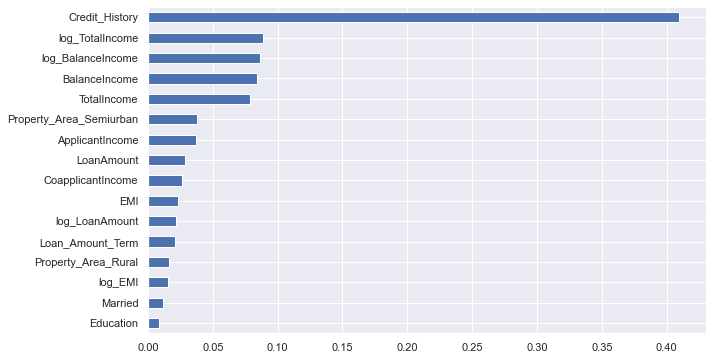

In [41]:
features = X.columns.tolist()
importance = model_rf.feature_importances_
rf_coefs = pd.Series(importance,index=features)

plt.figure(figsize=(10,6))
rf_coefs[(rf_coefs>0.005)].sort_values().plot.barh()
plt.show()

### Logistic regression 

In [42]:
from sklearn.linear_model import LogisticRegression
# hyperparameter tuning with Random Forest

param_grid = {
    'penalty' : [  'l2', 'none']
}

folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

scoring = ['accuracy', 'recall', 'precision']
lr = LogisticRegression(random_state=42)

# set up GridSearchCV()

model_cv_lr = GridSearchCV(lr,
                        scoring= scoring, 
                        param_grid = param_grid, 
                        refit='accuracy',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True)                         
                
model_cv_lr.fit(X, y)
cv_result_lr =pd.DataFrame(model_cv_lr.cv_results_)
display(cv_result_lr)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] penalty=l2 ......................................................
[CV]  penalty=l2, accuracy=(train=0.690, test=0.691), precision=(train=0.689, test=0.694), recall=(train=1.000, test=0.988), total=   0.1s
[CV] penalty=l2 ......................................................
[CV]  penalty=l2, accuracy=(train=0.690, test=0.691), precision=(train=0.689, test=0.691), recall=(train=1.000, test=1.000), total=   0.0s
[CV] penalty=l2 ......................................................
[CV]  penalty=l2, accuracy=(train=0.697, test=0.667), precision=(train=0.694, test=0.678), recall=(train=1.000, test=0.976), total=   0.0s
[CV] penalty=l2 ......................................................
[CV]  penalty=l2, accuracy=(train=0.690, test=0.659), precision=(train=0.690, test=0.675), recall=(train=1.000, test=0.964), total=   0.0s
[CV] penalty=l2 ......................................................
[CV]  penalty=l2, accuracy=(t

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] penalty=none ....................................................
[CV]  penalty=none, accuracy=(train=0.697, test=0.667), precision=(train=0.694, test=0.678), recall=(train=1.000, test=0.976), total=   0.0s
[CV] penalty=none ....................................................
[CV]  penalty=none, accuracy=(train=0.690, test=0.659), precision=(train=0.690, test=0.675), recall=(train=1.000, test=0.964), total=   0.0s
[CV] penalty=none ....................................................
[CV]  penalty=none, accuracy=(train=0.689, test=0.689), precision=(train=0.688, test=0.689), recall=(train=1.000, test=1.000), total=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,...,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision
0,0.025930,0.025702,0.003729,0.006074,l2,{'penalty': 'l2'},0.691057,0.691057,0.666667,0.658537,0.688525,0.679168,0.0138,1,0.690428,0.690428,0.696538,0.690428,0.689024,0.691369,0.002641,0.988235,1.0,0.97619,0.964286,...,0.985742,0.013888,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.694215,0.691057,0.677686,0.675,0.688525,0.685296,0.007577,1,0.689162,0.689162,0.694045,0.689796,0.688391,0.690111,0.002017
1,0.017133,0.003758,0.001794,0.001595,none,{'penalty': 'none'},0.691057,0.691057,0.666667,0.658537,0.688525,0.679168,0.0138,1,0.690428,0.690428,0.696538,0.690428,0.689024,0.691369,0.002641,0.988235,1.0,0.97619,0.964286,...,0.985742,0.013888,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.694215,0.691057,0.677686,0.675,0.688525,0.685296,0.007577,1,0.689162,0.689162,0.694045,0.689796,0.688391,0.690111,0.002017


In [43]:
print('Best score : ', model_cv_lr.best_score_, 'is obtained with ', model_cv_lr.best_params_)
model_lr = model_cv_lr.best_estimator_
#print("\n Best Estimator:",model_xgb)
model_lr.fit(X, y)

Best score :  0.6791683326669332 is obtained with  {'penalty': 'l2'}


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction on Test set

In [44]:
test_df = pd.read_csv('test_lAUu6dG.csv')

In [45]:
test_df_copy = test_df.copy()

In [46]:
# impute categorical columns with Mode and numerical values with mean

In [47]:
test_df['Gender'].fillna( test_df['Gender'].dropna().mode().values[0], inplace=True)
test_df['Married'].fillna( test_df['Married'].dropna().mode().values[0], inplace=True)
test_df['Dependents'].fillna( test_df['Dependents'].dropna().mode().values[0], inplace=True)
test_df['Self_Employed'].fillna( test_df['Self_Employed'].dropna().mode().values[0], inplace=True)
test_df['Loan_Amount_Term'].fillna( test_df['Loan_Amount_Term'].dropna().mode().values[0], inplace=True)
test_df['Credit_History'].fillna( test_df['Credit_History'].dropna().mode().values[0], inplace=True)

In [48]:
test_df['Dependents'] = test_df['Dependents'].str.rstrip('+').astype(np.int) # to replace 3+ with 3

test_df['Gender'] = test_df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
test_df['Married'] = test_df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
test_df['Education'] = test_df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
test_df['Self_Employed'] = test_df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)


In [49]:
test_df['LoanAmount'] = test_df['LoanAmount'].fillna( test_df['LoanAmount'].dropna().mean() )

In [50]:
test_df.drop(['Loan_ID'], axis=1, inplace=True)

In [51]:
test_df['LoanAmount'] = test_df['LoanAmount'] *  1000
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

p = test_df['LoanAmount']
n = test_df['Loan_Amount_Term']
test_df['EMI']= (p*r* np.power(1+r, n))/(np.power(1+r, n)-1)

#train_df['EMI'] = train_df['LoanAmount']/ train_df['Loan_Amount_Term']
test_df['BalanceIncome'] = (test_df['EMI'])/test_df['TotalIncome'] 

In [52]:
test_df['log_TotalIncome'] = np.log(test_df['TotalIncome'])
#test_df['log_ApplicantIncome'] = np.log(test_df['ApplicantIncome']+1)
#test_df['log_CoapplicantIncome'] = np.log(test_df['CoapplicantIncome']+1)
test_df['log_LoanAmount'] = np.log(test_df['LoanAmount'])
test_df['log_EMI'] = np.log(test_df['EMI'])
test_df['log_BalanceIncome'] = np.log(test_df['BalanceIncome'])

In [53]:
#test_df.drop(['TotalIncome', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'EMI', 'BalanceIncome', 'Loan_Amount_Term'], axis=1, inplace=True)

In [54]:
test_df = pd.get_dummies(test_df) 

In [55]:
X_test = test_df

In [56]:
X_test.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,EMI,BalanceIncome,log_TotalIncome,log_LoanAmount,log_EMI,log_BalanceIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.806540,0.771117,0.100817,4805.599455,1569.577657,136132.596685,342.822888,0.839237,6375.177112,1133.266880,0.199348,8.617263,11.735936,6.867839,-1.749425,0.302452,0.316076,0.381471
std,0.393417,0.482122,1.065177,0.420687,0.301498,4910.685399,2334.232099,60946.039812,64.658402,0.367814,5199.423594,1457.070441,0.196056,0.475716,0.416311,0.472679,0.474946,0.459947,0.465578,0.486411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28000.000000,6.000000,0.000000,1760.000000,256.817601,0.013976,7.473069,10.239960,5.548366,-4.270380,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2864.000000,0.000000,101000.000000,360.000000,1.000000,4156.000000,763.115157,0.147126,8.332308,11.522876,6.637409,-1.916464,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3786.000000,1025.000000,126000.000000,360.000000,1.000000,5205.000000,953.893946,0.179430,8.557375,11.744037,6.860552,-1.717973,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5060.000000,2430.500000,157500.000000,360.000000,1.000000,6980.000000,1188.698610,0.215487,8.850789,11.967176,7.080614,-1.534857,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,72529.000000,24000.000000,550000.000000,480.000000,1.000000,72529.000000,22616.991562,3.062715,11.191742,13.217674,10.026457,1.119302,1.000000,1.000000,1.000000


In [57]:
test_df_copy['Loan_Status_xgb'] = model_xgb.predict(X_test)
test_df_copy['Loan_Status_rf'] = model_rf.predict(X_test)
test_df_copy['Loan_Status_ada'] = model_rus.predict(X_test)

#test_df_copy['Loan_Status'] = test_df_copy['Loan_Status_xgb'] + test_df_copy['Loan_Status_rf'] + test_df_copy['Loan_Status_ada']
#test_df_copy['Loan_Status'] = test_df_copy['Loan_Status'].map({0:'N', 1:'N', 2:'Y', 3:'Y'})

#test_df_copy['Loan_Status'] = model_lr.predict(X_test)
test_df_copy['Loan_Status'] = model_rf.predict(X_test)
test_df_copy['Loan_Status'] = test_df_copy['Loan_Status'].map({0:'N', 1:'Y'})

In [58]:
test_df_copy[[ 'Loan_ID', 'Loan_Status']].to_csv('prediction.csv',index=False)